___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this assignment, you must apply ***EDA*** processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges. 

Also, this project aims to improve your ability to implement algorithms for ***Multi-Class Classification***. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

---
---

# #Determines

Dataset contains tree observations from four areas of one national forest district. This dataset includes information on tree type, shadow coverage, distance to nearby landmarks, soil type, and local topography. The goal of the project is to build a model that predicts what types of trees grow in an area.
***The Forest Dataset*** contains approximately 600 thousand lines, also you can easily find many information about it on the web (especially Kaggle).

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (forest, trees) knowledge on the internet to get to know the data set in the fastest way. 

You should implement cleaning, handling with outliers and missing values using Pandas, NumPy and other required modules for the best result in modeling. You should do Feature Engineering.

After that, your final dataset with the new variables you have created will be ready for model building. You will implement ***Support Vector Machine, XGBoost, Random Forest, Desicion Tree*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, create a chart comparing the performance of all models and choose the most successful model.


---
---

# #Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Load Dataset*
    
    *iii. Explore Data*

#### 2.  Data Cleaning
- Detect Missing Values and Outliers 

    *i. Missing Value Detection*
    
    *ii. Outlier Detection*
    
- Deal with Outliers
    
    *i. Drop Outliers*


#### 3. Feature Engineering


#### 4. Prediction (Multi-class Classification)
- Import libraries
- Data Preprocessing
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



---
---

## 1. Exploratory Data Analysis

### Import Libraries, Load Dataset, Exploring Data

#### *i. Import Libraries*

Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
#plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

#### *ii. Load Dataset*

In [2]:
df = pd.read_csv("treetypes.csv")
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,2696,123,10,212,48,2245,237,231,123,2113,...,0,0,0,0,0,0,0,0,0,6
1,3269,110,19,134,40,3734,249,216,88,3960,...,0,0,0,0,0,0,1,0,0,1
2,3283,322,18,346,104,4369,170,217,185,1330,...,0,0,0,0,0,0,1,0,0,7
3,2847,89,31,270,175,1320,248,173,29,889,...,0,0,0,0,0,0,0,0,0,5
4,3248,93,12,507,118,570,239,221,110,945,...,0,0,0,0,0,0,0,0,0,7


In [3]:
## it seems like Soil_Type and Wilderness_Area were transformed with get_dummies. The other features are continuous.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           250000 non-null  int64
 1   Aspect                              250000 non-null  int64
 2   Slope                               250000 non-null  int64
 3   Horizontal_Distance_To_Hydrology    250000 non-null  int64
 4   Vertical_Distance_To_Hydrology      250000 non-null  int64
 5   Horizontal_Distance_To_Roadways     250000 non-null  int64
 6   Hillshade_9am                       250000 non-null  int64
 7   Hillshade_Noon                      250000 non-null  int64
 8   Hillshade_3pm                       250000 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  250000 non-null  int64
 10  Wilderness_Area_1                   250000 non-null  int64
 11  Wilderness_Area_2                   250000 non-null 

#### *iii. Explore Data*
- Focus on numerical and categorical data
- Detect Number of Unique values of each column
- Focus on Target Variable (Cover_Type)
 - Detect relationships and correlations between independent variables and target variable.
 - It may be nice to visualize the class frequencies of the target variable.
- Detect relationships and correlations between independent variables. (You can prefer to keep only one of the highly correlated continuous variables.)
- Consider dropping features that contain little data or that you think will not contribute to the model.

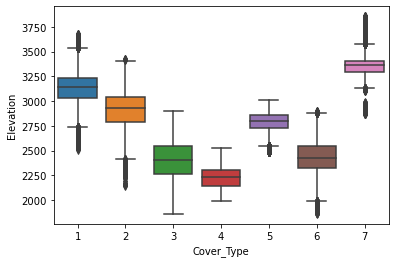

In [5]:
sns.boxplot(df.Cover_Type, df.Elevation);

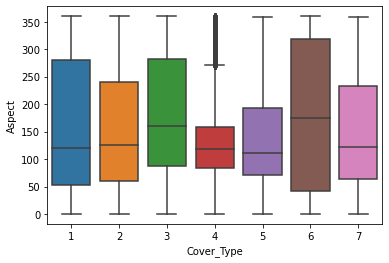

In [6]:
sns.boxplot(df.Cover_Type, df.Aspect);

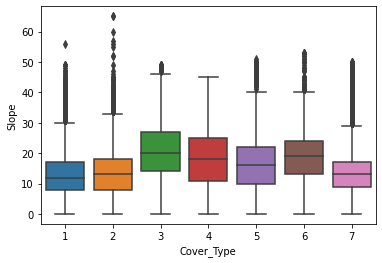

In [7]:
sns.boxplot(df.Cover_Type, df.Slope);

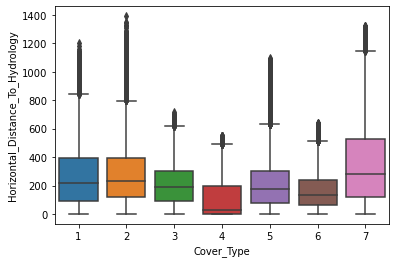

In [8]:
sns.boxplot(df.Cover_Type, df.Horizontal_Distance_To_Hydrology);

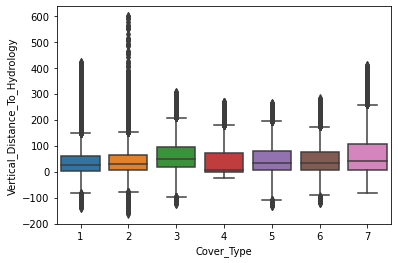

In [9]:
sns.boxplot(df.Cover_Type, df.Vertical_Distance_To_Hydrology );

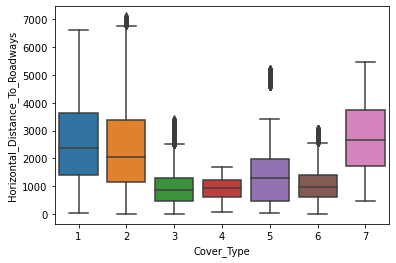

In [10]:
sns.boxplot(df.Cover_Type, df.Horizontal_Distance_To_Roadways);

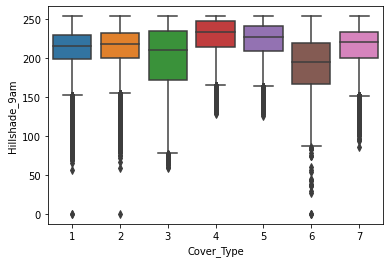

In [11]:
sns.boxplot(df.Cover_Type, df.Hillshade_9am );

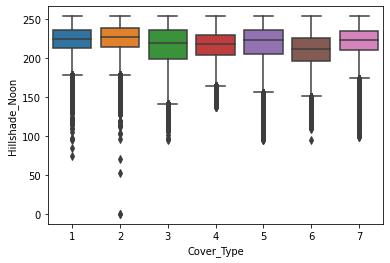

In [12]:
sns.boxplot(df.Cover_Type, df.Hillshade_Noon );

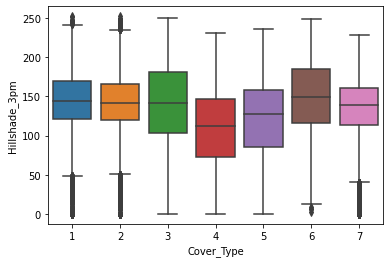

In [13]:
sns.boxplot(df.Cover_Type, df.Hillshade_3pm );

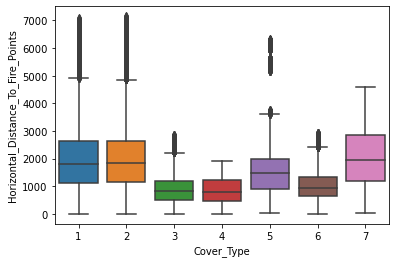

In [14]:
sns.boxplot(df.Cover_Type, df.Horizontal_Distance_To_Fire_Points);

In [15]:
df.groupby("Cover_Type").Wilderness_Area_1.value_counts()

Cover_Type  Wilderness_Area_1
1           0                    17960
            1                    17876
2           1                    18575
            0                    17205
3           0                    35391
4           0                    35529
5           0                    21827
            1                    14252
6           0                    35695
7           0                    26818
            1                     8872
Name: Wilderness_Area_1, dtype: int64

In [16]:
df.groupby("Cover_Type").Wilderness_Area_2.value_counts()

Cover_Type  Wilderness_Area_2
1           0                    32655
            1                     3181
2           0                    34623
            1                     1157
3           0                    35391
4           0                    35529
5           0                    36079
6           0                    35695
7           0                    31688
            1                     4002
Name: Wilderness_Area_2, dtype: int64

In [17]:
df.groupby("Cover_Type").Wilderness_Area_3.value_counts()

Cover_Type  Wilderness_Area_3
1           0                    21118
            1                    14718
2           0                    20114
            1                    15666
3           0                    21485
            1                    13906
4           0                    35529
5           1                    21757
            0                    14322
6           0                    20062
            1                    15633
7           1                    22776
            0                    12914
Name: Wilderness_Area_3, dtype: int64

In [18]:
df.groupby("Cover_Type").Wilderness_Area_4.value_counts()

Cover_Type  Wilderness_Area_4
1           0                    35836
2           0                    35398
            1                      382
3           1                    21375
            0                    14016
4           1                    35529
5           0                    36079
6           1                    19887
            0                    15808
7           0                    35690
Name: Wilderness_Area_4, dtype: int64

In [19]:
df[df["Wilderness_Area_1"]==1].Wilderness_Area_2.value_counts()

0    59575
Name: Wilderness_Area_2, dtype: int64

In [20]:
df[df["Wilderness_Area_2"]==1].Wilderness_Area_3.value_counts()

0    8340
Name: Wilderness_Area_3, dtype: int64

In [21]:
df[df["Wilderness_Area_3"]==1].Wilderness_Area_4.value_counts()

0    104456
Name: Wilderness_Area_4, dtype: int64

In [22]:
df["Wilderness_Area"] = df.Wilderness_Area_1
df["Wilderness_Area"][df.Wilderness_Area_2==1] = 2
df["Wilderness_Area"][df.Wilderness_Area_3==1] = 3
df["Wilderness_Area"][df.Wilderness_Area_4==1] = 4
df.Wilderness_Area.value_counts()

3    104456
4     77173
1     59575
2      8340
0       456
Name: Wilderness_Area, dtype: int64

In [23]:
df.drop(columns=["Wilderness_Area_1","Wilderness_Area_2","Wilderness_Area_3", "Wilderness_Area_4"], inplace=True)

In [24]:
## There are some rows without Wilderness areas. We can think of them as other wilderness areas. But in the introduction, we were told that there are 4 areas. We might drop these rows or fill them.

In [25]:
df["Soil_Type"] = df.Soil_Type_1
df["Soil_Type"][df.Soil_Type_2 == 1] = 2
df["Soil_Type"][df.Soil_Type_3 == 1] = 3
df["Soil_Type"][df.Soil_Type_4 == 1] = 4
df["Soil_Type"][df.Soil_Type_5 == 1] = 5
df["Soil_Type"][df.Soil_Type_6 == 1] = 6
df["Soil_Type"][df.Soil_Type_7 == 1] = 7
df["Soil_Type"][df.Soil_Type_8 == 1] = 8
df["Soil_Type"][df.Soil_Type_9 == 1] = 9
df["Soil_Type"][df.Soil_Type_10== 1] = 10
df["Soil_Type"][df.Soil_Type_11== 1] = 11
df["Soil_Type"][df.Soil_Type_12== 1] = 12
df["Soil_Type"][df.Soil_Type_13== 1] = 13
df["Soil_Type"][df.Soil_Type_14== 1] = 14
df["Soil_Type"][df.Soil_Type_15== 1] = 15
df["Soil_Type"][df.Soil_Type_16== 1] = 16
df["Soil_Type"][df.Soil_Type_17== 1] = 17
df["Soil_Type"][df.Soil_Type_18== 1] = 18
df["Soil_Type"][df.Soil_Type_19== 1] = 19
df["Soil_Type"][df.Soil_Type_20 == 1] = 20
df["Soil_Type"][df.Soil_Type_21 == 1] = 21
df["Soil_Type"][df.Soil_Type_22 == 1] = 22
df["Soil_Type"][df.Soil_Type_23 == 1] = 23
df["Soil_Type"][df.Soil_Type_24 == 1] = 24
df["Soil_Type"][df.Soil_Type_25 == 1] = 25
df["Soil_Type"][df.Soil_Type_26 == 1] = 26
df["Soil_Type"][df.Soil_Type_27 == 1] = 27
df["Soil_Type"][df.Soil_Type_28 == 1] = 28
df["Soil_Type"][df.Soil_Type_29 == 1] = 29
df["Soil_Type"][df.Soil_Type_30 == 1] = 30
df["Soil_Type"][df.Soil_Type_31 == 1] = 31
df["Soil_Type"][df.Soil_Type_32 == 1] = 32
df["Soil_Type"][df.Soil_Type_33 == 1] = 33
df["Soil_Type"][df.Soil_Type_34 == 1] = 34
df["Soil_Type"][df.Soil_Type_35 == 1] = 35
df["Soil_Type"][df.Soil_Type_36 == 1] = 36
df["Soil_Type"][df.Soil_Type_37 == 1] = 37
df["Soil_Type"][df.Soil_Type_38 == 1] = 38
df["Soil_Type"][df.Soil_Type_39 == 1] = 39
df["Soil_Type"][df.Soil_Type_40 == 1] = 40
df.Soil_Type.value_counts()

10    31533
0     23063
29    21182
3     14594
23    11890
30    11738
4     11730
38    11505
32    10395
39    10347
33     9970
6      9349
2      8966
13     8017
17     7633
40     6723
11     5901
22     5501
31     4997
1      4586
12     3934
24     3850
5      2259
20     1895
35     1616
14     1577
16     1151
18      879
26      797
19      717
37      463
34      375
27      211
21      157
9       153
28      150
36       99
25       58
8        23
7        15
15        1
Name: Soil_Type, dtype: int64

In [26]:
## Soil_Type has 23063 zero value. Does that mean that they are other soil types?

In [27]:
df.drop(columns=["Soil_Type_1","Soil_Type_2","Soil_Type_3","Soil_Type_4","Soil_Type_5","Soil_Type_6","Soil_Type_7","Soil_Type_8","Soil_Type_9","Soil_Type_10",
                 "Soil_Type_11","Soil_Type_12", "Soil_Type_13", "Soil_Type_14", "Soil_Type_15", "Soil_Type_16", "Soil_Type_17", "Soil_Type_18", "Soil_Type_19","Soil_Type_20",
                "Soil_Type_21","Soil_Type_22","Soil_Type_23","Soil_Type_24","Soil_Type_25","Soil_Type_26","Soil_Type_27","Soil_Type_28","Soil_Type_29","Soil_Type_30",
                "Soil_Type_31","Soil_Type_32","Soil_Type_33","Soil_Type_34","Soil_Type_35","Soil_Type_36","Soil_Type_37","Soil_Type_38","Soil_Type_39","Soil_Type_40"], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 13 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           250000 non-null  int64
 1   Aspect                              250000 non-null  int64
 2   Slope                               250000 non-null  int64
 3   Horizontal_Distance_To_Hydrology    250000 non-null  int64
 4   Vertical_Distance_To_Hydrology      250000 non-null  int64
 5   Horizontal_Distance_To_Roadways     250000 non-null  int64
 6   Hillshade_9am                       250000 non-null  int64
 7   Hillshade_Noon                      250000 non-null  int64
 8   Hillshade_3pm                       250000 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  250000 non-null  int64
 10  Cover_Type                          250000 non-null  int64
 11  Wilderness_Area                     250000 non-null 

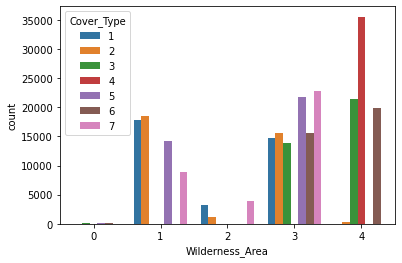

In [28]:
sns.countplot(df.Wilderness_Area, hue=df.Cover_Type);

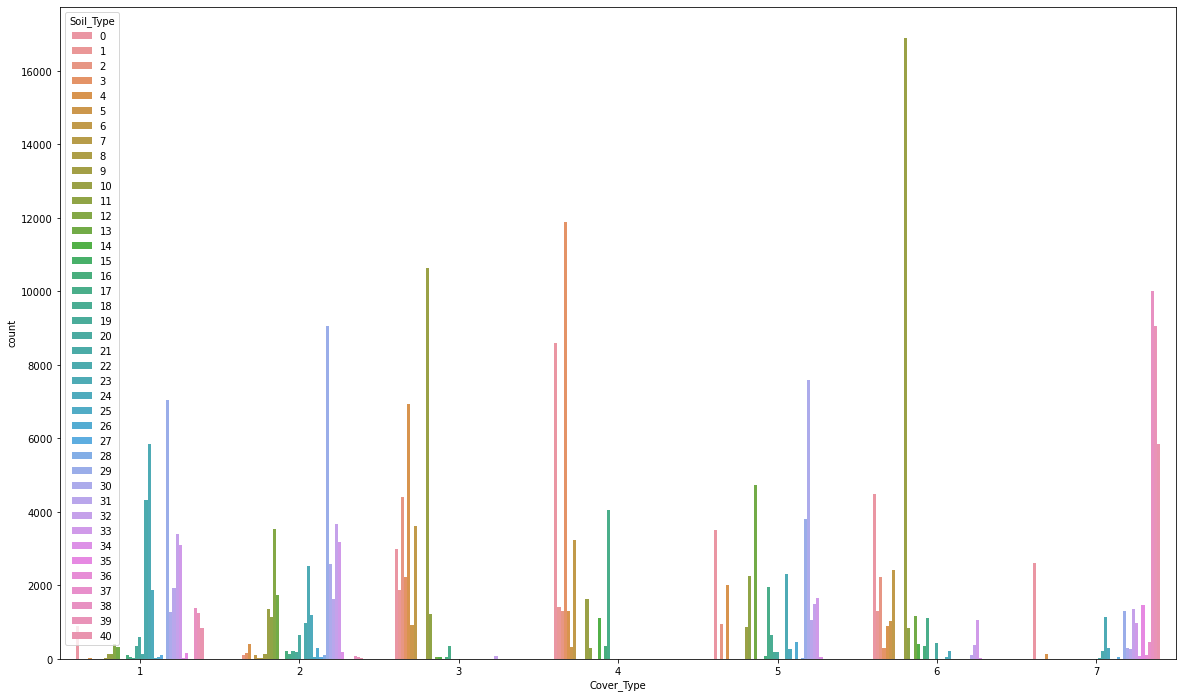

In [29]:
plt.figure(figsize=(20,12))
sns.countplot(df.Cover_Type, hue=df.Soil_Type);

***
***

## 2.  Data Cleaning

### Detect Missing Values and Outliers

#### *i. Missing Value Detection*

In [30]:
df.isnull().sum().any()

False

#### *ii. Outlier Detection*

The columns which have continuous value should be examined in terms of [outliers](https://datascience.foundation/sciencewhitepaper/knowing-all-about-outliers-in-machine-learning) (Watch out for columns that look like continuous but not continuous!). Some algorithms are [sensitive to outliers](https://arsrinevetha.medium.com/ml-algorithms-sensitivity-towards-outliers-f3862a13c94d), but some algorithms can tolerate them. You can decide to outlier detection according to the algorithm you will use.
- You can check the outliers shape of continous features with respect to the target (Cover_Type) classes.
- You can check how many outliers are there of each continuous variables.
- The columns which have continuous value should be examined in terms of outliers.
- You can define a function to detect outliers in accordance with the ``zscore`` or ``IQR``.

In [31]:
## We have seen that there are outliers in our dataset while EDA process.

### Deal with Outliers

#### *ii. Drop Outliers*

In [32]:
df.head().T

,0,1,2,3,4
Elevation,2696,3269,3283,2847,3248
Aspect,123,110,322,89,93
Slope,10,19,18,31,12
Horizontal_Distance_To_Hydrology,212,134,346,270,507
Vertical_Distance_To_Hydrology,48,40,104,175,118
Horizontal_Distance_To_Roadways,2245,3734,4369,1320,570
Hillshade_9am,237,249,170,248,239
Hillshade_Noon,231,216,217,173,221
Hillshade_3pm,123,88,185,29,110
Horizontal_Distance_To_Fire_Points,2113,3960,1330,889,945


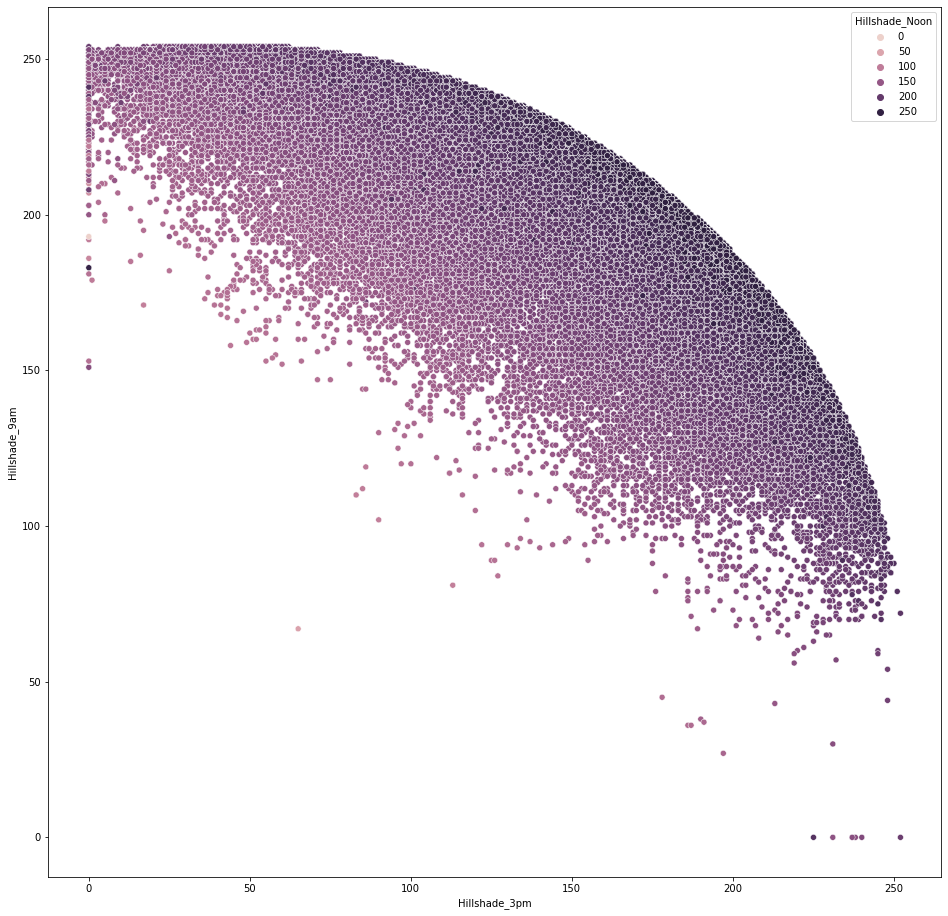

In [33]:
## there can be some relation between some columns. for example: hillshade.

plt.figure(figsize=(16,16))

sns.scatterplot(df.Hillshade_3pm,df.Hillshade_9am,hue=df.Hillshade_Noon);

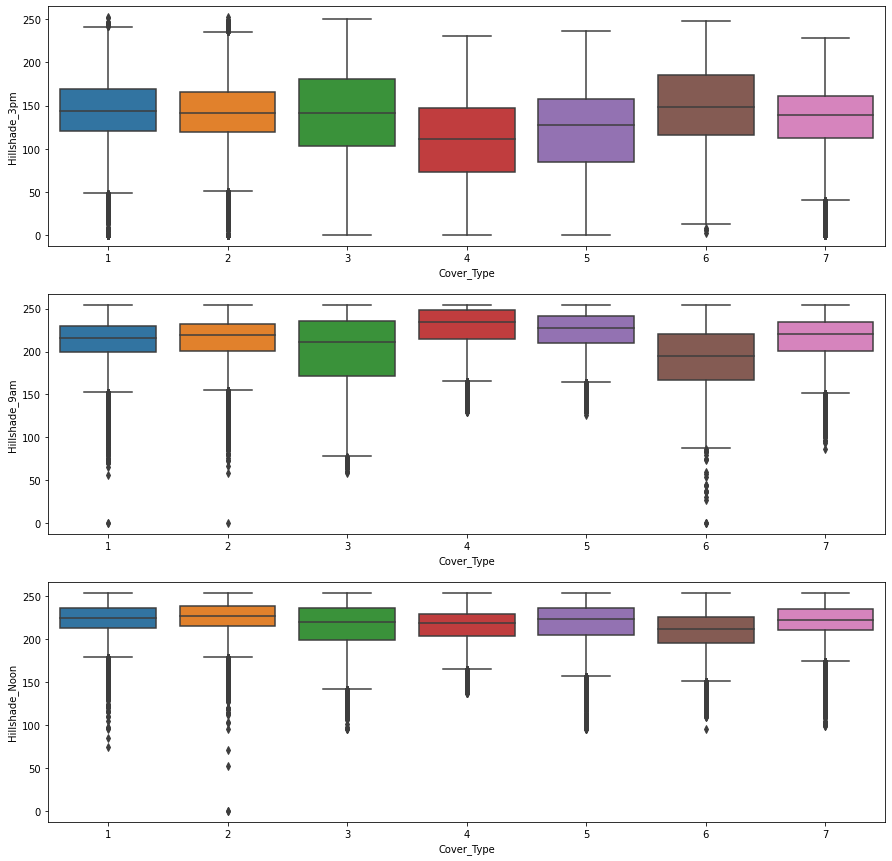

In [34]:
fig , ax = plt.subplots(3,1,figsize=(15,15))

sns.boxplot(y = df.Hillshade_3pm , x = df["Cover_Type"], ax=ax[0],whis=1.5)
sns.boxplot(y = df.Hillshade_9am , x = df["Cover_Type"], ax=ax[1],whis=1.5)
sns.boxplot(y = df.Hillshade_Noon , x = df["Cover_Type"], ax=ax[2],whis=1.5);

In [35]:
df1 = df[~((df["Hillshade_3pm"]==0)|(df["Hillshade_9am"]==0)|(df["Hillshade_Noon"]==0))]
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 248816 entries, 0 to 249999
Data columns (total 13 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           248816 non-null  int64
 1   Aspect                              248816 non-null  int64
 2   Slope                               248816 non-null  int64
 3   Horizontal_Distance_To_Hydrology    248816 non-null  int64
 4   Vertical_Distance_To_Hydrology      248816 non-null  int64
 5   Horizontal_Distance_To_Roadways     248816 non-null  int64
 6   Hillshade_9am                       248816 non-null  int64
 7   Hillshade_Noon                      248816 non-null  int64
 8   Hillshade_3pm                       248816 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  248816 non-null  int64
 10  Cover_Type                          248816 non-null  int64
 11  Wilderness_Area                     248816 non-null 

In [36]:
df1.drop(index=(df[(df["Hillshade_3pm"]<100)&(df["Hillshade_9am"]<100)].index), inplace=True)  ## it looks like an outlier when we look at the scatterplot.

In [37]:
df1[df1.Wilderness_Area == 0]["Soil_Type"]  ## We have said that we would drop or fill the rows. I chose to drop them.

533        0
778        0
1340       0
1929       0
2501       0
          ..
247466     0
247936    10
247939     0
248031     4
248803     0
Name: Soil_Type, Length: 456, dtype: int64

In [38]:
df1.drop(index=(df1[df1["Wilderness_Area"]==0].index), inplace=True)

In [39]:
df1.Wilderness_Area.value_counts()

3    103977
4     76773
1     59269
2      8340
Name: Wilderness_Area, dtype: int64

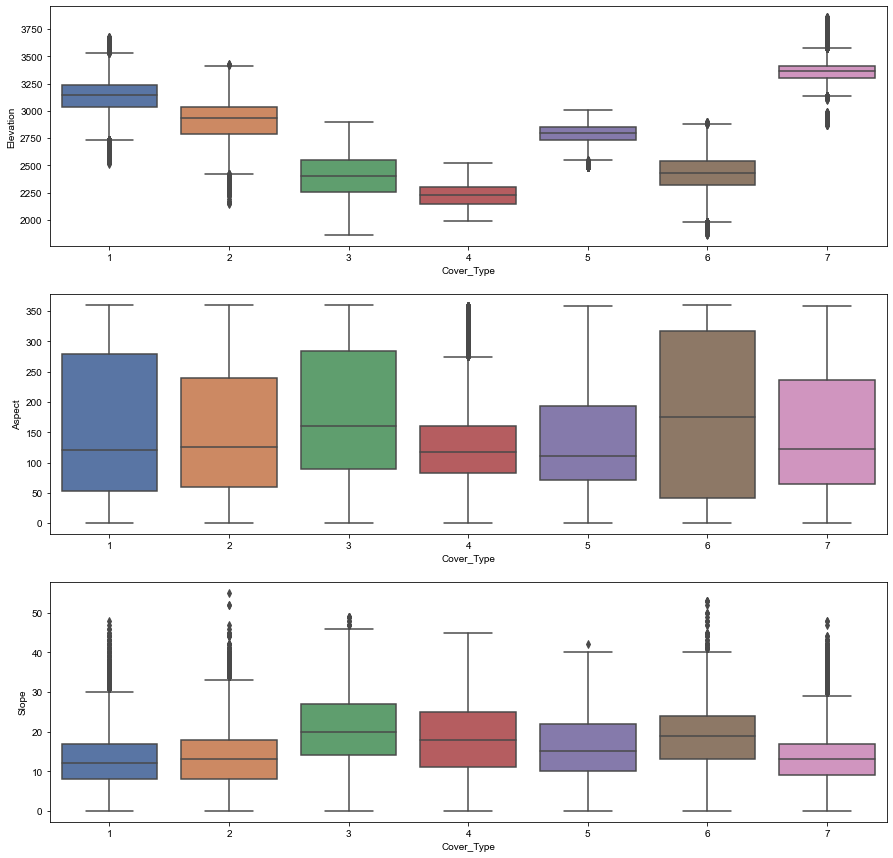

In [40]:
fig , ax = plt.subplots(3,1,figsize=(15,15))
sns.set(style="ticks")

sns.boxplot(y = df1.Elevation , x = df1["Cover_Type"], ax=ax[0],whis=1.5)
sns.boxplot(y = df1.Aspect , x = df1["Cover_Type"], ax=ax[1],whis=1.5)
sns.boxplot(y = df1.Slope , x = df1["Cover_Type"], ax=ax[2],whis=1.5);

In [41]:
df1.drop(index=df1[df1["Slope"]>60].index, inplace=True)
df1.drop(index=df1[(df1["Cover_Type"]==1)&(df1["Slope"]>50)].index, inplace=True)

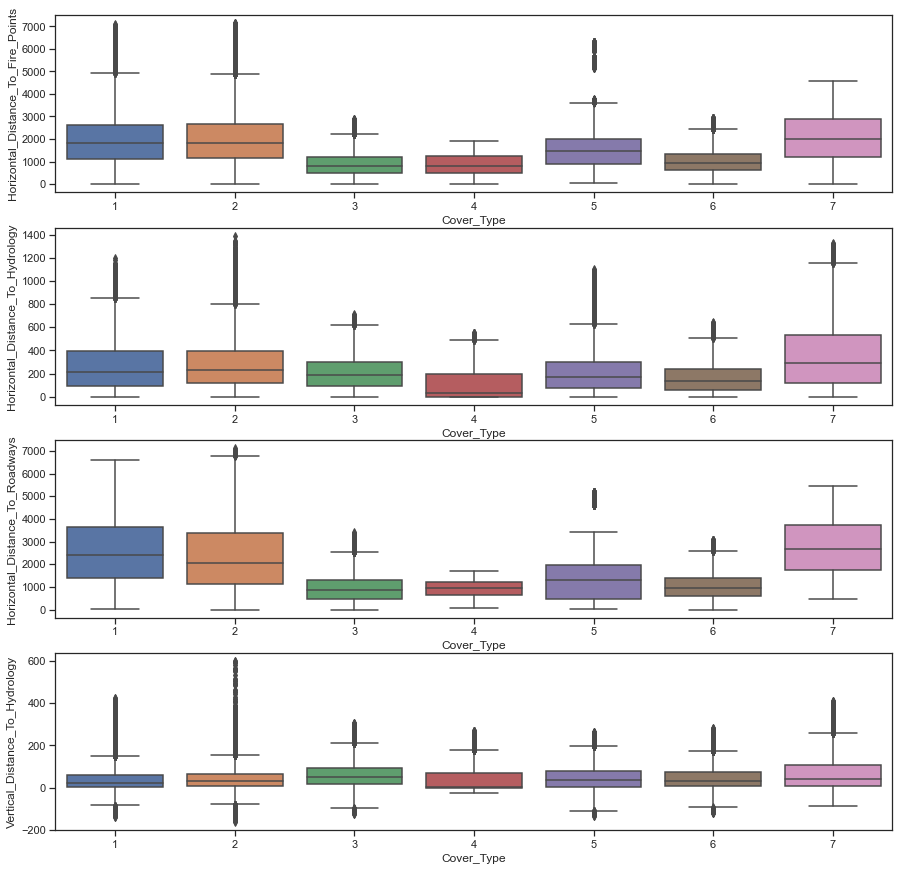

In [42]:
fig , ax = plt.subplots(4,1,figsize=(15,15))
sns.set(style="ticks")

sns.boxplot(y = df1.Horizontal_Distance_To_Fire_Points , x = df1["Cover_Type"], ax=ax[0],whis=1.5)
sns.boxplot(y = df1.Horizontal_Distance_To_Hydrology , x = df1["Cover_Type"], ax=ax[1],whis=1.5)
sns.boxplot(y = df1.Horizontal_Distance_To_Roadways, x = df1["Cover_Type"], ax=ax[2],whis=1.5)
sns.boxplot(y = df1.Vertical_Distance_To_Hydrology, x = df1["Cover_Type"], ax=ax[3],whis=1.5);

### Now, let's take a closer look at correlation of continuous columns.

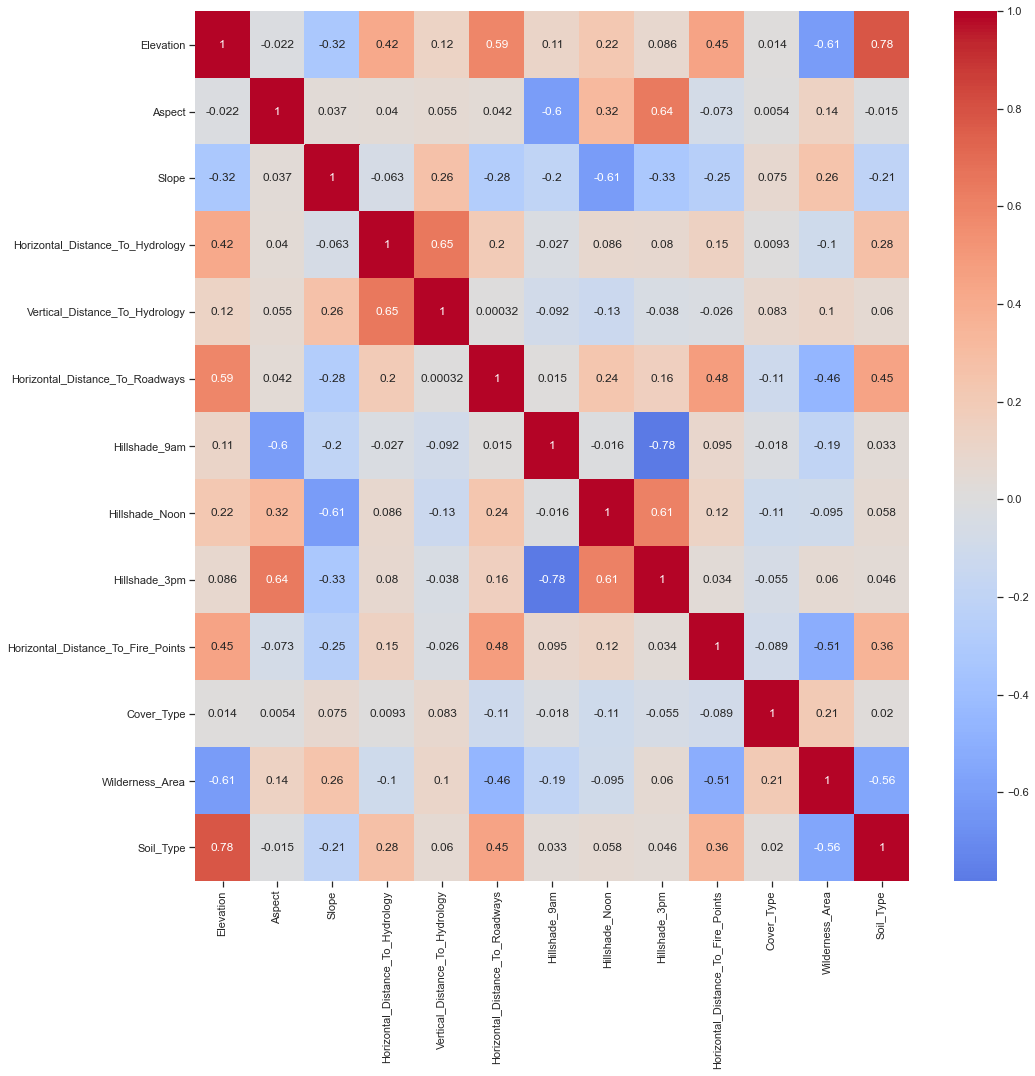

In [43]:
plt.figure(figsize=(16,16))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", center=0);

***
***

## 4. Prediction (Multi-class Classification)

If you have done, use your data set resulting from Feature Engineering task. If you haven't done Feature Engineering, use the latest version of your data set.
In this section, you have two main tasks that apply to each algorithm:
1. Model Building and Prediction

 - SVM (Use ``LinearSVC`` model from``sklearn.svm`` module)
 - Decision Tree (Use ``DecisionTreeClassifier`` model from ``sklearn.tree`` module)
 - Random Forest (Use ``RandomForestClassifier`` model from ``sklearn.ensemble`` module) 
 - XGBoost (Use ``XGBClassifier`` model from``xgboost`` module)

2. Visualizing the Result

- Use [yellowbrick](https://www.scikit-yb.org/en/latest/), [seaborn](https://seaborn.pydata.org/tutorial/regression.html) or [matplotlib](https://matplotlib.org/) modules to visualize the model results.

- Show three plots for the results:
 - Class Prediction Error Bar Plot
 - Confusion Matrix
 - Classification Report

### Import Libraries

In [44]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sqlalchemy import create_engine
import warnings
from IPython.core.pylabtools import figsize
from scipy.stats import zscore
from scipy import stats
from numpy import percentile
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV
from statsmodels.formula.api import ols
from scipy.stats import zscore
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier , GradientBoostingClassifier
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.model_selection import TimeSeriesSplit
from yellowbrick.classifier import ClassificationReport
from yellowbrick.datasets import load_occupancy
from sklearn.metrics import f1_score
font_title = {'family': 'times new roman', 'color': 'darkred', 
              'weight': 'bold', 'size': 14}

warnings.filterwarnings('ignore')

plt.rcParams['figure.dpi'] = 100

### Data Preprocessing

- Drop target variable
- Train-Test Split

*Note: You can use the train and test data generated here for all algorithms.*

In [45]:
# We don't need get_dummies in desicion tree models. but we need get_dummies in svm.
 
svm_df = pd.get_dummies(df1, drop_first=True)

X = svm_df.drop(columns="Cover_Type")
y = svm_df.Cover_Type

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y, random_state=101)

### Implement Support Vector Machine
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

*Note: You probably won't get a successful result. You may need to make some changes to the model or data. This may be a topic worth investigating, you decide.*

In [47]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [48]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [49]:
modelSVM = BaggingClassifier(SVC(kernel="linear"), n_jobs=-1, max_samples=.1,n_estimators=5)

In [50]:
modelSVM.fit(X_train_scaled , y_train)

BaggingClassifier(base_estimator=SVC(kernel='linear'), max_samples=0.1,
                  n_estimators=5, n_jobs=-1)

In [51]:
y_pred_test = modelSVM.predict(X_test_scaled)
y_pred_train = modelSVM.predict(X_train_scaled)

In [52]:
eval_metric(modelSVM, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[6790 1780    2    0  481   60 1603]
 [2411 5112  174    3 2371  421  228]
 [   0   16 5437 1621  360 3114    0]
 [   0    0  526 9690    0  354    0]
 [  46 1322  313    0 8692  356    0]
 [   0  124 2156 1157  429 6789    0]
 [1408    1   19    0   20    0 9122]]
              precision    recall  f1-score   support

           1       0.64      0.63      0.64     10716
           2       0.61      0.48      0.54     10720
           3       0.63      0.52      0.57     10548
           4       0.78      0.92      0.84     10570
           5       0.70      0.81      0.75     10729
           6       0.61      0.64      0.62     10655
           7       0.83      0.86      0.85     10570

    accuracy                           0.69     74508
   macro avg       0.69      0.69      0.69     74508
weighted avg       0.69      0.69      0.69     74508


Train_Set
[[15744  4312    11     0  1033   149  3754]
 [ 5564 11801   444    16  5687  1008   492]
 [    0    34 12755  3887 

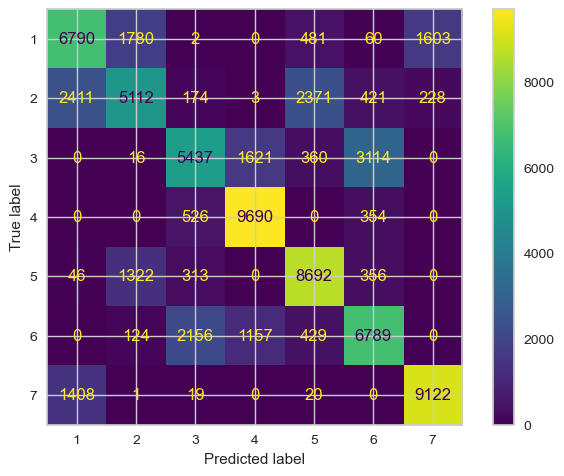

In [53]:
plot_confusion_matrix(modelSVM, X_test_scaled, y_test);

In [54]:
param_grid = {
    'base_estimator__C': np.linspace(0.01,1, 3),
}

In [55]:
model = BaggingClassifier(SVC(kernel="linear"), n_jobs=-1, max_samples=.1,n_estimators=5,random_state=6)
svm_model_grid = GridSearchCV(model,
                              param_grid,
                              verbose=2,
                              scoring="f1_macro",
                              n_jobs=-1)

svm_model_grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(estimator=BaggingClassifier(base_estimator=SVC(kernel='linear'),
                                         max_samples=0.1, n_estimators=5,
                                         n_jobs=-1, random_state=6),
             n_jobs=-1,
             param_grid={'base_estimator__C': array([0.01 , 0.505, 1.   ])},
             scoring='f1_macro', verbose=2)

In [56]:
y_pred_test = svm_model_grid.predict(X_test_scaled)
y_pred_train = svm_model_grid.predict(X_train_scaled)

In [57]:
svm_accuracy_test = accuracy_score(y_test, y_pred_test)
svm_accuracy_train = accuracy_score(y_train, y_pred_train)

svm_f1_test = f1_score(y_test, y_pred_test, average='macro')
svm_f1_train = f1_score(y_train, y_pred_train, average='macro')

svm_accuracy_test, svm_accuracy_train, svm_f1_test, svm_f1_train

(0.6923283405808772,
 0.6940138394372193,
 0.6859070550626998,
 0.6873865728289944)

In [58]:
eval_metric(svm_model_grid, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[6797 1779    2    0  466   59 1613]
 [2393 5138  180    1 2352  417  239]
 [   0   13 5386 1588  365 3196    0]
 [   0    0  526 9637    0  407    0]
 [  61 1336  307    0 8663  362    0]
 [   0  178 2098 1133  420 6826    0]
 [1393    1    8    0   31    0 9137]]
              precision    recall  f1-score   support

           1       0.64      0.63      0.64     10716
           2       0.61      0.48      0.54     10720
           3       0.63      0.51      0.57     10548
           4       0.78      0.91      0.84     10570
           5       0.70      0.81      0.75     10729
           6       0.61      0.64      0.62     10655
           7       0.83      0.86      0.85     10570

    accuracy                           0.69     74508
   macro avg       0.69      0.69      0.69     74508
weighted avg       0.69      0.69      0.69     74508


Train_Set
[[15753  4279     7     0  1031   146  3787]
 [ 5531 11851   456     9  5661  1008   496]
 [    0    28 12605  3838 

### Implement Decision Tree Classifier
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

In [59]:
X = df1.drop(columns="Cover_Type")
y = df1.Cover_Type

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y, random_state=101)

In [61]:
modelTree = DecisionTreeClassifier()

modelTree.fit(X_train , y_train)

DecisionTreeClassifier()

In [62]:
modelTree = BaggingClassifier(DecisionTreeClassifier(), n_jobs=-1, max_samples=.1,n_estimators=10)

modelTree.fit(X_train , y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.1,
                  n_jobs=-1)

In [63]:
y_pred_test = modelTree.predict(X_test)
y_pred_train = modelTree.predict(X_train)

In [64]:
modelTree_accuracy_test = accuracy_score(y_test, y_pred_test)
modelTree_accuracy_train = accuracy_score(y_train, y_pred_train)

modelTree_f1_test = f1_score(y_test, y_pred_test, average='macro')
modelTree_f1_train = f1_score(y_train, y_pred_train, average='macro')

modelTree_accuracy_test, modelTree_accuracy_train, modelTree_f1_test, modelTree_f1_train

(0.8967896064852097,
 0.9182748445507934,
 0.8955561020535748,
 0.9174279369912545)

In [65]:
eval_metric(modelTree, X_train, y_train, X_test, y_test)

Test_Set
[[ 8790  1335     6     0   160    13   412]
 [ 1967  7705   185     0   584   232    47]
 [    0    38  9454   283    55   718     0]
 [    0     0    92 10443     0    35     0]
 [   10   117    69     0 10491    42     0]
 [    3    47   778   142    62  9623     0]
 [  252     4     0     0     2     0 10312]]
              precision    recall  f1-score   support

           1       0.80      0.82      0.81     10716
           2       0.83      0.72      0.77     10720
           3       0.89      0.90      0.89     10548
           4       0.96      0.99      0.97     10570
           5       0.92      0.98      0.95     10729
           6       0.90      0.90      0.90     10655
           7       0.96      0.98      0.97     10570

    accuracy                           0.90     74508
   macro avg       0.90      0.90      0.90     74508
weighted avg       0.90      0.90      0.90     74508


Train_Set
[[21513  2289    12     0   308    34   847]
 [ 3668 19212   393   

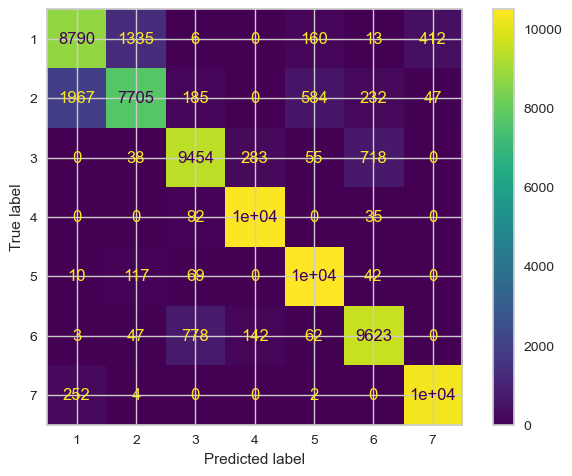

In [66]:
plot_confusion_matrix(modelTree, X_test, y_test);

In [67]:
from yellowbrick.classifier import ClassPredictionError

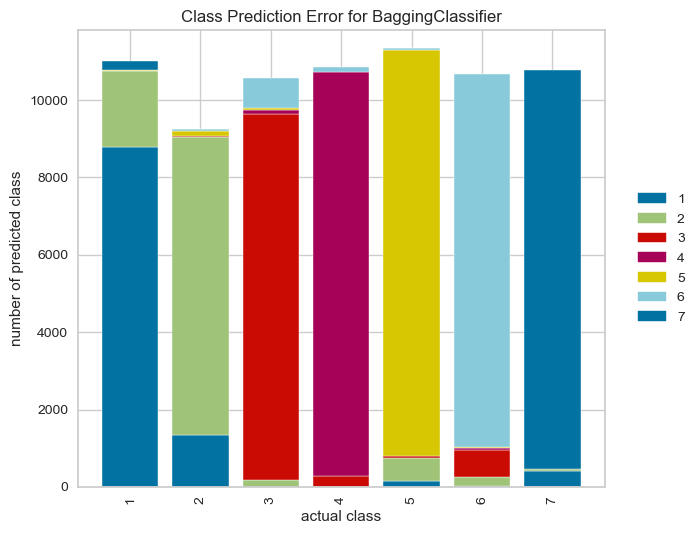

<AxesSubplot:title={'center':'Class Prediction Error for BaggingClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [68]:
visualizer = ClassPredictionError(modelTree)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show()

### Implement Random Forest Classifier
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

In [69]:
rfc = RandomForestClassifier(n_estimators=100)

rfc.fit(X_train, y_train)

RandomForestClassifier()

In [70]:
y_pred_test = rfc.predict(X_test)
y_pred_train = rfc.predict(X_train)

In [71]:
eval_metric(rfc, X_train, y_train, X_test, y_test)

Test_Set
[[ 9723   806     3     0    41     9   134]
 [  801  9505    96     0   160   133    25]
 [    0    12 10206    96    13   221     0]
 [    0     0     9 10554     0     7     0]
 [    0    19    13     0 10692     5     0]
 [    0     4    95    52     9 10495     0]
 [   36     2     0     0     1     0 10531]]
              precision    recall  f1-score   support

           1       0.92      0.91      0.91     10716
           2       0.92      0.89      0.90     10720
           3       0.98      0.97      0.97     10548
           4       0.99      1.00      0.99     10570
           5       0.98      1.00      0.99     10729
           6       0.97      0.98      0.98     10655
           7       0.99      1.00      0.99     10570

    accuracy                           0.96     74508
   macro avg       0.96      0.96      0.96     74508
weighted avg       0.96      0.96      0.96     74508


Train_Set
[[25003     0     0     0     0     0     0]
 [    0 25012     0   

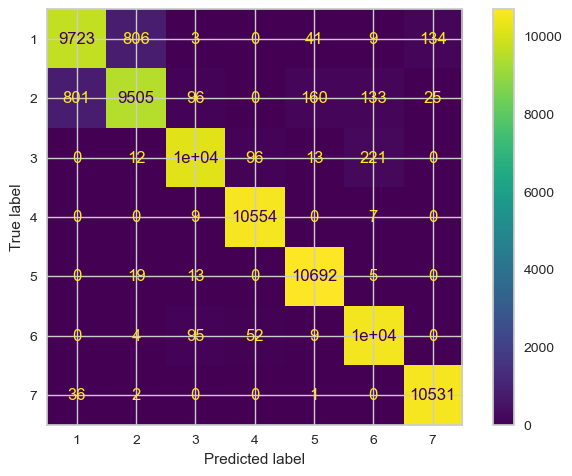

In [72]:
plot_confusion_matrix(rfc, X_test, y_test);

In [73]:
param_grid = {'n_estimators':[30,100,200],
             'criterion': ["gini","entropy"],
             'max_depth':[10,13,16],
             'min_samples_split':[2,6,10],
             }

In [74]:
rf_model = RandomForestClassifier()
rf_grid_model = GridSearchCV(rf_model,
                             param_grid,
                             verbose=2,
                             scoring="accuracy",
                             n_jobs=-1)

rf_grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 13, 16],
                         'min_samples_split': [2, 6, 10],
                         'n_estimators': [30, 100, 200]},
             scoring='accuracy', verbose=2)

In [75]:
y_pred_test = rf_grid_model.predict(X_test)
y_pred_train = rf_grid_model.predict(X_train)

In [76]:
rfc_accuracy_test = accuracy_score(y_test, y_pred_test)
rfc_accuracy_train = accuracy_score(y_train, y_pred_train)

rfc_f1_test = f1_score(y_test, y_pred_test, average='macro')
rfc_f1_train = f1_score(y_train, y_pred_train, average='macro')

rfc_accuracy_test, rfc_accuracy_train, rfc_f1_test, rfc_f1_train

(0.9431470446126591, 0.9775554929221, 0.9426713731742705, 0.9775130124340831)

TEST REPORT
              precision    recall  f1-score   support

           1       0.89      0.87      0.88     10716
           2       0.89      0.83      0.86     10720
           3       0.97      0.93      0.95     10548
           4       0.98      1.00      0.99     10570
           5       0.96      1.00      0.98     10729
           6       0.93      0.98      0.95     10655
           7       0.98      1.00      0.99     10570

    accuracy                           0.94     74508
   macro avg       0.94      0.94      0.94     74508
weighted avg       0.94      0.94      0.94     74508




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           1       0.95      0.96      0.96     25003
           2       0.96      0.93      0.95     25012
           3       0.99      0.97      0.98     24614
           4       1.00      1.00      1.00     24664
           5       0.98      1.00      0.9

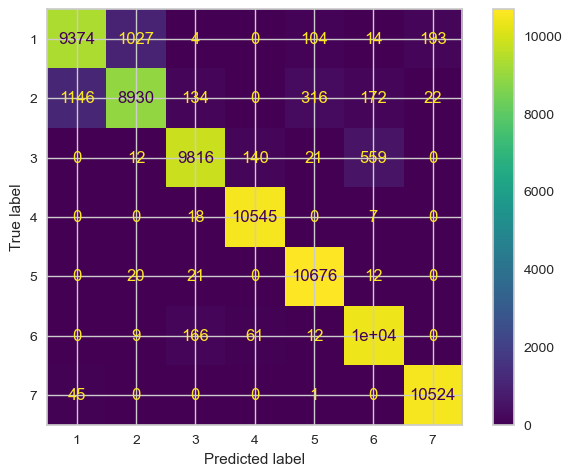

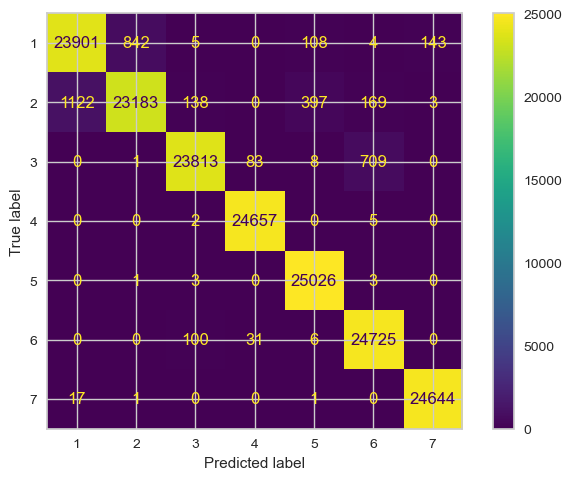

In [77]:
print("TEST REPORT")
print(classification_report(y_test, y_pred_test))
plot_confusion_matrix(rf_grid_model, X_test, y_test);

print("\n"*3, "-*"*30)
print("TRAIN REPORT")
print(classification_report(y_train, y_pred_train))
plot_confusion_matrix(rf_grid_model, X_train, y_train);

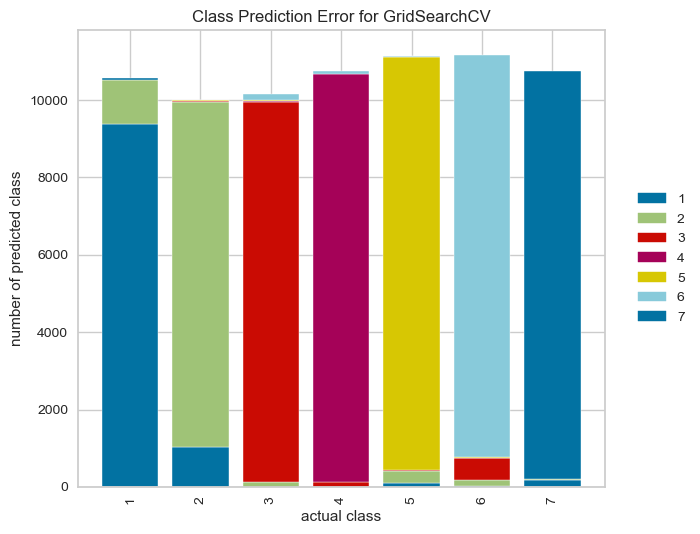

<AxesSubplot:title={'center':'Class Prediction Error for GridSearchCV'}, xlabel='actual class', ylabel='number of predicted class'>

In [78]:
visualizer = ClassPredictionError(rf_grid_model)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show()

### Implement XGBoost Classifer
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

In [79]:
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train , y_train)

XGBClassifier(objective='multi:softprob')

In [80]:
y_pred_test = xgb_classifier.predict(X_test)
y_pred_train = xgb_classifier.predict(X_train)

In [81]:
xgb_accuracy_test = accuracy_score(y_test, y_pred_test)
xgb_accuracy_train = accuracy_score(y_train, y_pred_train)

xgb_f1_test = f1_score(y_test, y_pred_test, average='macro')
xgb_f1_train = f1_score(y_train, y_pred_train, average='macro')

xgb_accuracy_test, xgb_accuracy_train, xgb_f1_test, xgb_f1_train

(0.7617973908842004,
 0.7667772978009905,
 0.7564272740733842,
 0.7611828071567875)

TEST REPORT
              precision    recall  f1-score   support

           1       0.69      0.68      0.69     10716
           2       0.74      0.52      0.61     10720
           3       0.68      0.65      0.67     10548
           4       0.88      0.95      0.92     10570
           5       0.76      0.88      0.82     10729
           6       0.69      0.71      0.70     10655
           7       0.87      0.93      0.90     10570

    accuracy                           0.76     74508
   macro avg       0.76      0.76      0.76     74508
weighted avg       0.76      0.76      0.76     74508




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           1       0.70      0.68      0.69     25003
           2       0.73      0.52      0.61     25012
           3       0.70      0.66      0.68     24614
           4       0.89      0.96      0.92     24664
           5       0.76      0.89      0.8

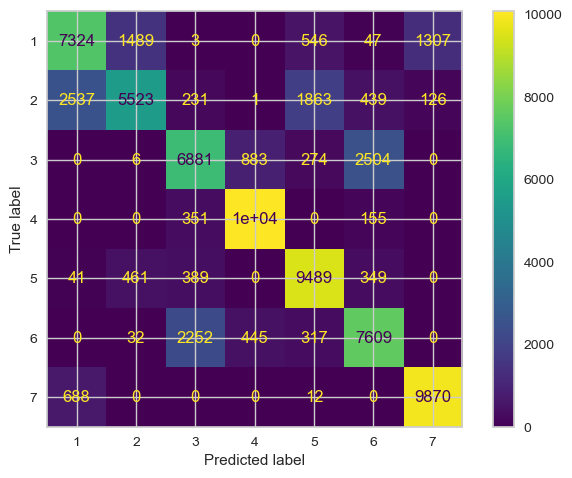

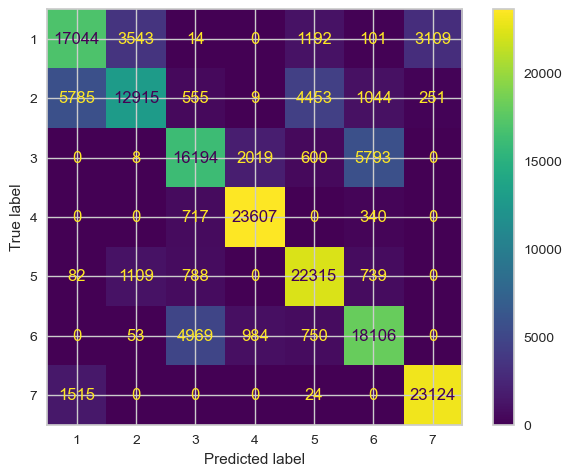

In [82]:
print("TEST REPORT")
print(classification_report(y_test, y_pred_test))
plot_confusion_matrix(xgb_classifier, X_test, y_test);

print("\n"*3, "-*"*30)
print("TRAIN REPORT")
print(classification_report(y_train, y_pred_train))
plot_confusion_matrix(xgb_classifier, X_train, y_train);

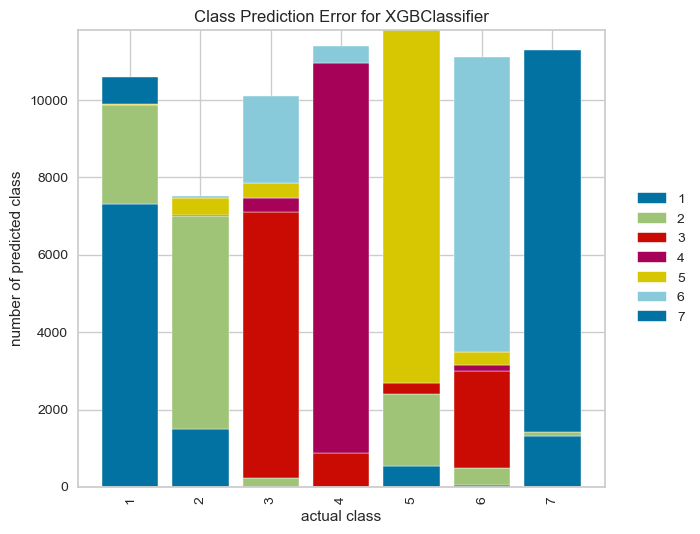

<AxesSubplot:title={'center':'Class Prediction Error for XGBClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [83]:
visualizer = ClassPredictionError(xgb_classifier)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show()

### Compare The Models

So far, you have created a multi-classifier model with 4 different algorithms and made predictions. You can observe the performance of the models together with a barplot of your choice.

- Which algorithm did you achieve the highest prediction performance with? 
- What could be the factors that cause this? What are the principles of the most successful algorithm and its differences from other algorithms? 

In contrast;

- Which algorithm did you achieve the lowest prediction performance with? 
- What could be the factors that cause this? What are the principles of the most successful algorithm and its differences from other algorithms? 

The answers you will look for to these questions will increase your gains from Machine Learning course.

# Accuracy Comparison

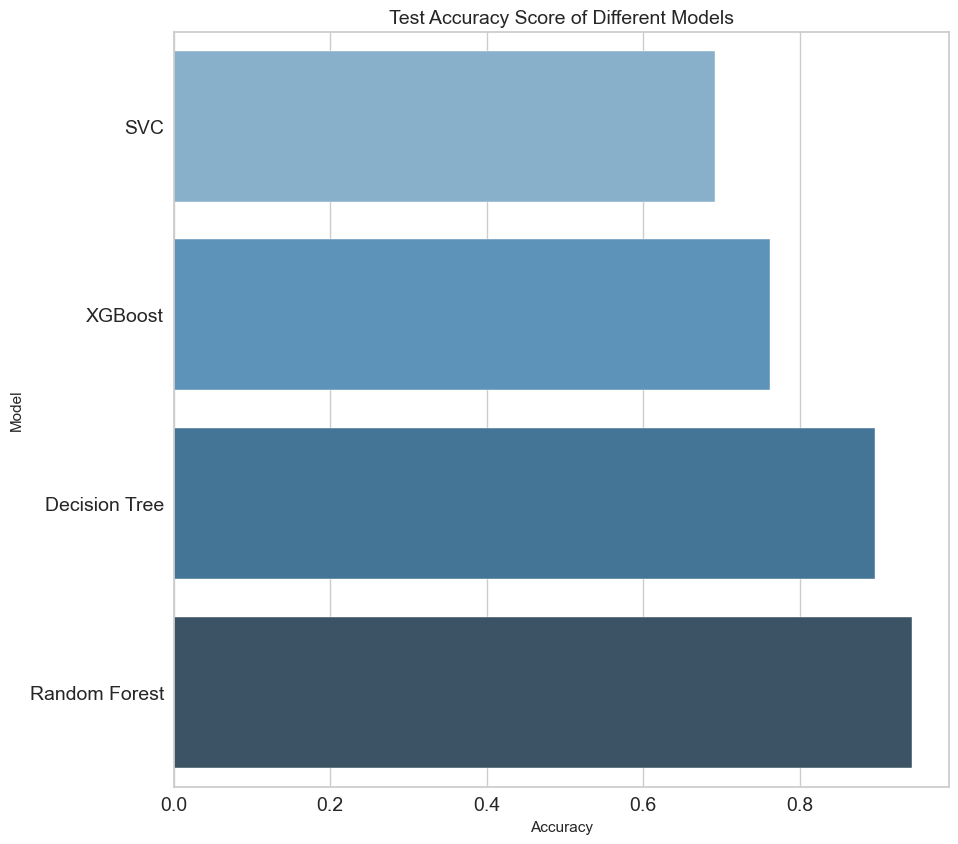

In [84]:
compare = pd.DataFrame({"Model": ["SVC", "Random Forest", "XGBoost", "Decision Tree"],
                        "Accuracy": [svm_accuracy_test, rfc_accuracy_test, xgb_accuracy_test, modelTree_accuracy_test]})

compare = compare.sort_values(by="Accuracy", ascending=True)

plt.figure(figsize=(10,10))
ax = sns.barplot(x="Accuracy", y="Model", data=compare, palette="Blues_d")

plt.yticks(size = 14)
plt.xticks(size = 14)
plt.title("Test Accuracy Score of Different Models", size=14);

Text(0.5, 1.0, 'Train Accuracy Score of Different Models')

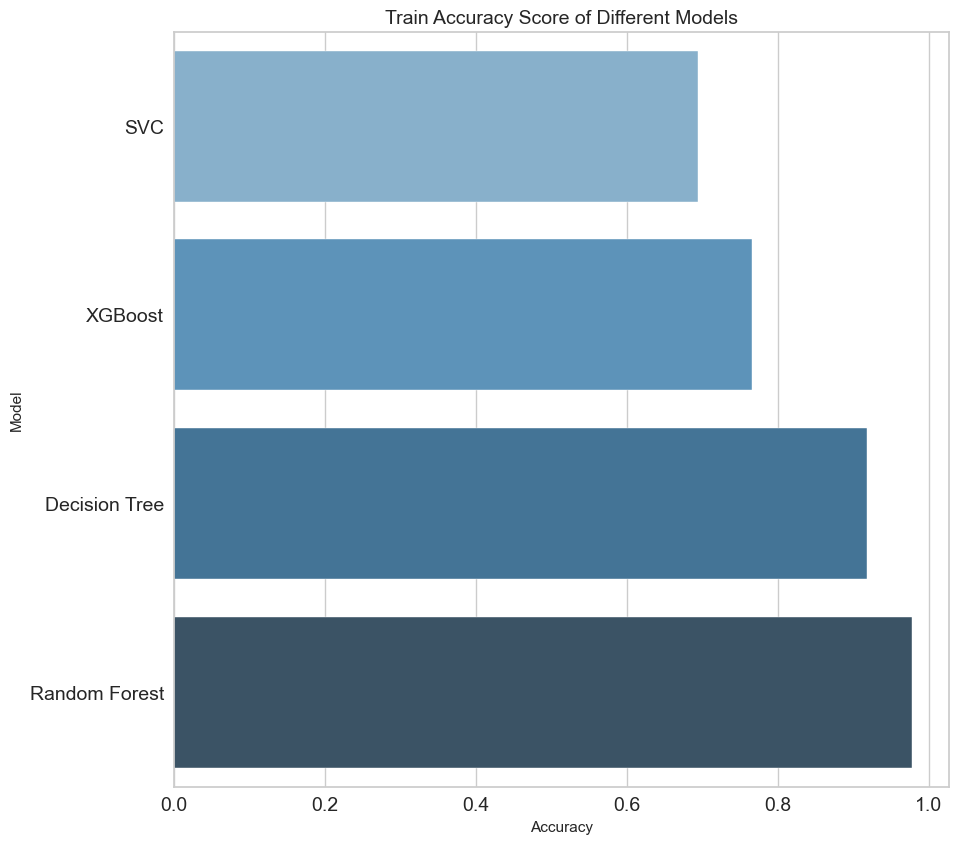

In [85]:
compare = pd.DataFrame({"Model": ["SVC", "Random Forest", "XGBoost", "Decision Tree"],
                        "Accuracy": [svm_accuracy_train, rfc_accuracy_train, xgb_accuracy_train, modelTree_accuracy_train]})

compare = compare.sort_values(by="Accuracy", ascending=True)

plt.figure(figsize=(10,10))
ax = sns.barplot(x="Accuracy", y="Model", data=compare, palette="Blues_d")

plt.yticks(size = 14)
plt.xticks(size = 14)
plt.title("Train Accuracy Score of Different Models", size=14)

# F1 Score Comparison

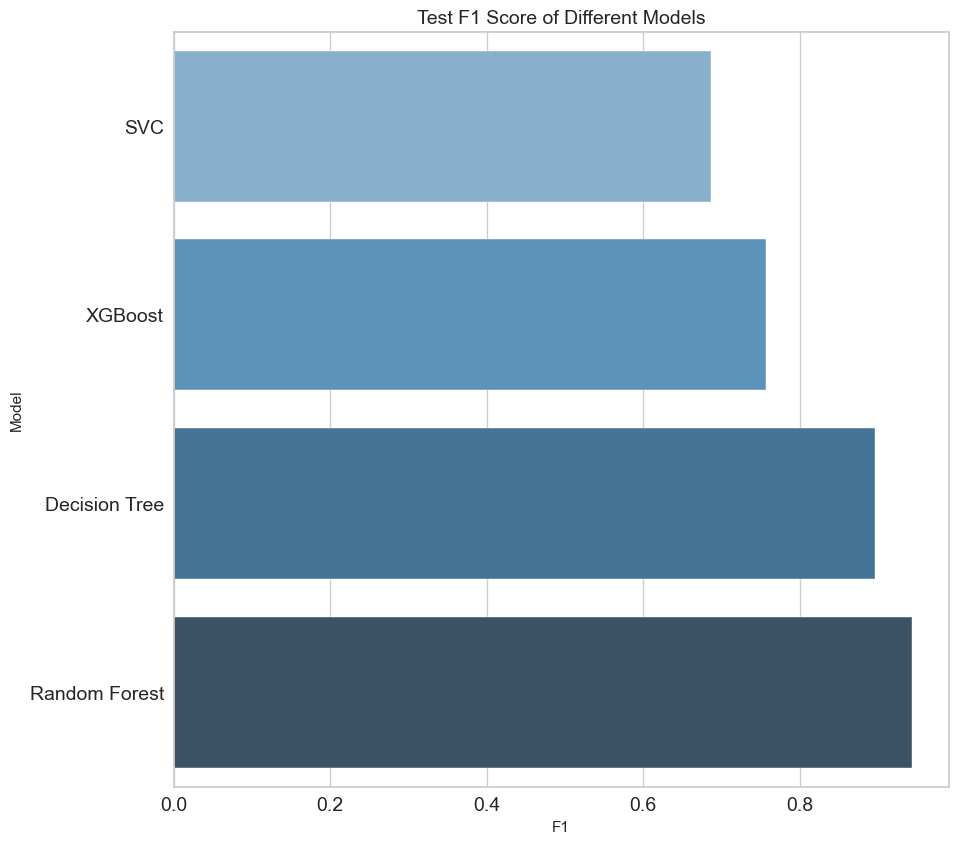

In [86]:
compare = pd.DataFrame({"Model": ["SVC", "Random Forest", "XGBoost", "Decision Tree"],
                        "F1": [svm_f1_test, rfc_f1_test, xgb_f1_test, modelTree_f1_test]})

compare = compare.sort_values(by="F1", ascending=True)

plt.figure(figsize=(10,10))
ax = sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")

plt.yticks(size = 14)
plt.xticks(size = 14)
plt.title("Test F1 Score of Different Models", size=14);

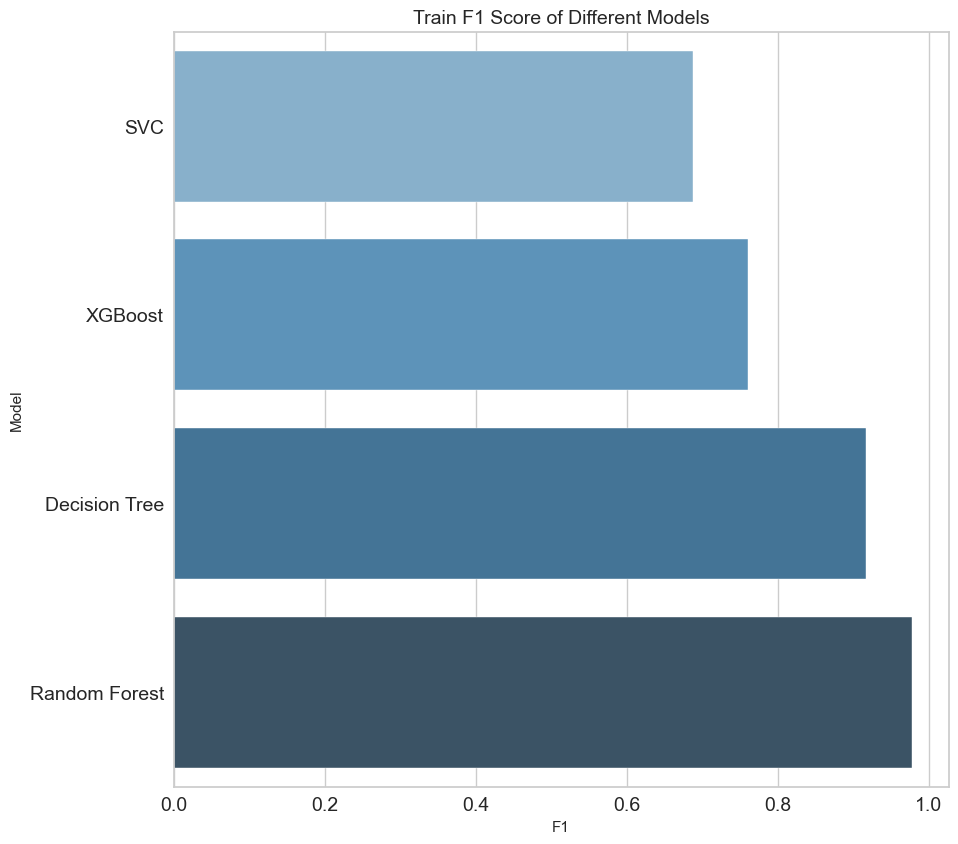

In [87]:
compare = pd.DataFrame({"Model": ["SVC", "Random Forest", "XGBoost", "Decision Tree"],
                        "F1": [svm_f1_train, rfc_f1_train, xgb_f1_train, modelTree_f1_train]})

compare = compare.sort_values(by="F1", ascending=True)

plt.figure(figsize=(10,10))
ax = sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")

plt.yticks(size = 14)
plt.xticks(size = 14)
plt.title("Train F1 Score of Different Models", size=14);

In [88]:
final_model = rf_grid_model